In [1]:
%matplotlib inline

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math


In [14]:
#get the stop segment
csv_stop = pd.read_csv("./../data/iot.stops.csv",sep = '\t',header = 0)
csv_route = pd.read_csv("./../data/iot.routes.csv",sep = '\t',header = 0)

#for calculate the distances between 2 stops 
csv_record = pd.read_csv("./../data/iot.iot1.csv",sep = '\t',header = 0)

In [59]:
csv_route_num1 = csv_route[(csv_route.routeNumber ==1) & (csv_route.isGo2Work == True) ]
csv_route_num1 = csv_route_num1.sort_values(["seqNumber"],ascending = True)
csv_route_num1 = csv_route_num1.iloc[:,1:7]

In [70]:
route_stops = csv_route_num1.merge(csv_stop,left_on='stopId',right_on = '_id')

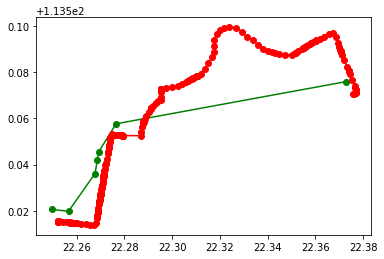

In [99]:
plt.plot(route_stops.latitude,route_stops.longitude, "g",location['latitude'],location['longtitude'],'r',marker = 'o')

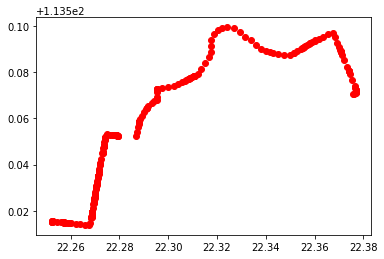

In [74]:
plt.plot(location['latitude'],location['longtitude'],'ro')

In [75]:
plt.plot?

In [60]:
csv_route_num1.head()

,busId,isGo2Work,plannedArrivalTime,routeNumber,seqNumber,stopId
2,5ae8393c3023169da447c2ae,True,7:23,1,1,5ae83320748fb2a67c5f6e54
16,5ae8393c3023169da447c2ae,True,7:26,1,2,5ae8334c748fb2a67c5f6e55
6,5ae8393c3023169da447c2ae,True,7:34,1,3,5ae8336c748fb2a67c5f6e56
14,5ae8393c3023169da447c2ae,True,7:37,1,4,5ae834df567e17937cf407e1
0,5ae8393c3023169da447c2ae,True,7:38,1,5,5ae83521567e17937cf407e2


In [41]:
csv_stop[csv_stop._id == "5ae83320748fb2a67c5f6e54"]

,_id,isGoToWork,latitude,longitude,stopName,updated
0,5ae83320748fb2a67c5f6e54,True,22.249541,113.520559,明珠中,2018-05-01T09:28:00.844Z


In [42]:
route_stops.

,routeNumber,seqNumber,latitude,longitude
count,7.0,7.000000,7.000000,7.000000
mean,1.0,4.000000,22.271258,113.548201
std,0.0,2.160247,0.046734,0.021044
min,1.0,1.000000,22.236448,113.520559
25%,1.0,2.500000,22.247432,113.533834
50%,1.0,4.000000,22.250497,113.543161
75%,1.0,5.500000,22.272182,113.565048
max,1.0,7.000000,22.372631,113.575924


In [71]:
#csv_stop.head()
route_stops.head(10)
#csv_stop.head()


,busId,isGo2Work,plannedArrivalTime,routeNumber,seqNumber,stopId,_id,isGoToWork,latitude,longitude,stopName,updated
0,5ae8393c3023169da447c2ae,True,7:23,1,1,5ae83320748fb2a67c5f6e54,5ae83320748fb2a67c5f6e54,True,22.249541,113.520559,明珠中,2018-05-01T09:28:00.844Z
1,5ae8393c3023169da447c2ae,True,7:26,1,2,5ae8334c748fb2a67c5f6e55,5ae8334c748fb2a67c5f6e55,True,22.256653,113.519771,翠微,2018-05-01T09:28:44.366Z
2,5ae8393c3023169da447c2ae,True,7:34,1,3,5ae8336c748fb2a67c5f6e56,5ae8336c748fb2a67c5f6e56,True,22.267762,113.536134,仁恒星园,2018-05-01T09:29:16.147Z
3,5ae8393c3023169da447c2ae,True,7:37,1,4,5ae834df567e17937cf407e1,5ae834df567e17937cf407e1,True,22.268722,113.542062,香洲区府,2018-05-01T09:35:27.388Z
4,5ae8393c3023169da447c2ae,True,7:38,1,5,5ae83521567e17937cf407e2,5ae83521567e17937cf407e2,True,22.269261,113.545517,南村,2018-05-01T09:36:33.812Z
5,5ae8393c3023169da447c2ae,True,7:40,1,6,5ae8353d567e17937cf407e3,5ae8353d567e17937cf407e3,True,22.276603,113.557696,兴业中,2018-05-01T09:37:01.373Z
6,5ae8393c3023169da447c2ae,True,8:30,1,7,5af85642ac5680781c7bb90c,5af85642ac5680781c7bb90c,True,22.372631,113.575924,南方软件园,2018-05-13T15:14:10.382Z


In [2]:
#filter 5-18 
csv_record_bus1 = csv_record[(csv_record['bus']== 1.0)
                              & (csv_record['device']== 'stm32') 
                              & (pd.to_datetime(csv_record['updated']) > pd.to_datetime('2018/05/17 23:00',utc = True))
                              & (pd.to_datetime(csv_record['updated']) < pd.to_datetime('2018/05/18 00:40',utc = True))] # filter all bus1 data

NameError: name 'csv_record' is not defined

In [7]:
csv_record_bus1 = csv_record_bus1.sort_values(by = 'updated',ascending = True)

In [8]:
bus1_copy = csv_record_bus1.copy()

In [9]:
location = bus1_copy.iloc[:,3:5]

In [102]:
location.head()

,latitude,longtitude
9966,22.252169,113.515373
9967,22.252136,113.515480
9968,22.252207,113.515297
9969,22.252222,113.515213
9970,22.252190,113.515236


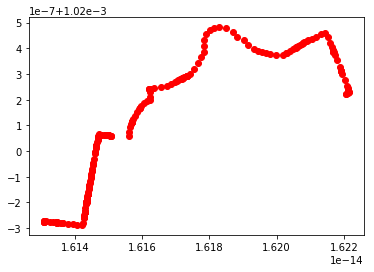

In [120]:
plt.plot(location['latitude'],location['longtitude'],'ro')

In [12]:
#get csv_record_bus1 1 day's data for distance calculate()


In [117]:
#坐标系转平面坐标
def mct2x(lat):
    x = lat/ 20037508.3427892 * 180 
    #y = lon/ 20037508.3427892 * 180 
    #y = 180 / math.pi * (2 * math.atan(math.exp(y * math.pi / 180)) - math.pi / 2) 
    return x
def mct2y(lon):
    result = []
    for i in lon:
        y = i/ 20037508.3427892 * 180 
        y = 180 / math.pi * (2 * math.atan(math.exp(y * math.pi / 180)) - math.pi / 2) 
        result.append(y)
    return result

In [118]:
location.latitude = mct2x(location.latitude)
location.longtitude = mct2y(location.longtitude)

In [119]:
location.head()

,latitude,longtitude
9966,1.613090e-14,0.00102
9967,1.613088e-14,0.00102
9968,1.613093e-14,0.00102
9969,1.613094e-14,0.00102
9970,1.613092e-14,0.00102
